In [1]:
import numpy as np
import pandas as pd
import sys, os, time
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../..')

In [3]:
from src.sampling_algorithms.event_time_samplers import gaussian_bounce
from src.sampling_algorithms import BPS
from src.utils import gaussian_grad_potential_fn, get_xtv,interp, get_first_moment, get_var, get_second_moment
from src.plots.arrow_plot import arrow_plot

In [4]:
d=2
init_x = np.array([np.random.random(1)[0] for _ in range(d)])
init_v = np.repeat(1,d)
refresh_rate = 0.1

#Sig = np.diag(np.repeat(1., d))
rho = 0.
sig1 = 1
sig2 =1
sig12 = rho*sig1*sig2
Sig = np.array([[sig1, sig12],[sig12,sig2]])
mu = np.repeat(0., d)
bounce_fn = gaussian_bounce(mu, Sig)

grad_entropy_fn = lambda x: np.array(x)

In [5]:
bps = BPS(init_x, init_v, bounce_fn, grad_entropy_fn, refresh_rate)

In [6]:
start = time.time()
nsim = 10**4
res = bps.simulate(nsim)
res = np.array(res)
print(time.time()-start)


0.6646873950958252


In [8]:
x1,t1,v1=get_xtv(res,0)
x2,t2,v2=get_xtv(res,1)

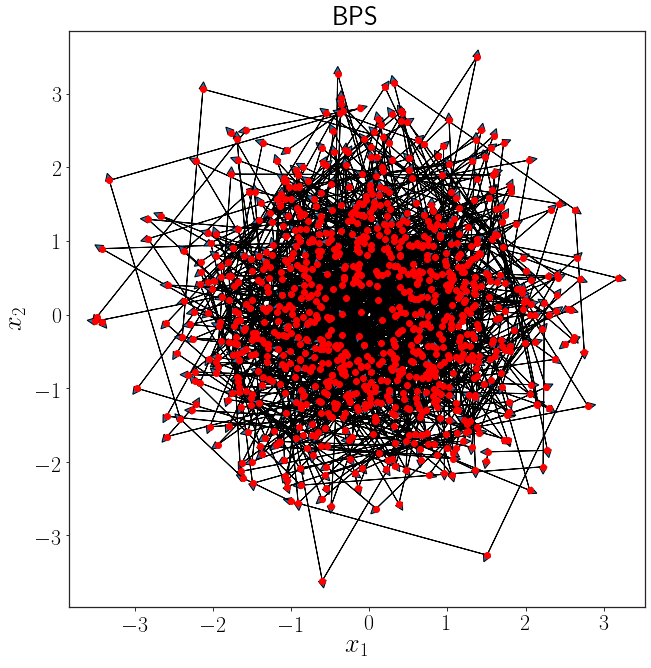

In [13]:
plot_limit = 1000
fig_size = (10,10)
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


fig = plt.figure(figsize=fig_size,frameon =True)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
ax.set_title("BPS")
ax.set_xlabel("$x_1$",fontsize='large', fontweight='bold')
ax.set_ylabel("$x_2$",fontsize='large', fontweight='bold')

arrow_plot(x1[:plot_limit],x2[:plot_limit])
fig.savefig('./bps.eps', format='eps', dpi=1200)
